In [1]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns
import sys

# Own files
sys.path.append('./')
import preprocessing
import organize_data
import utils
import feature_extraction
import data_analysis

# Data analysis
This file will contain the final pipeline for the data analysis done in this project. It is divided into three parts:
1. Data extraction
2. Preprocessing and feature extraction
3. PCA and SVM

## Data extraction
Here, the data is loaded and transformed into a more desireable format and being cleared for further use.

### Choose experiments

In [2]:
# Display all available experiments
experiments = utils.get_list_of_experiments()

print(f"Here is a list of all the available experiments:")
for i in range(len(experiments)):
    print(f"{i}: {experiments[i]}")

num_experiments = len(experiments)

Here is a list of all the available experiments:
0: Experiment_3PVWV
1: Experiment_5CJFZ
2: Experiment_5DFP4
3: Experiment_AN1EA
4: Experiment_D4N2B
5: Experiment_IRYMM
6: Experiment_L8KAD
7: Experiment_R7M37
8: Experiment_ROGVO
9: Experiment_VNLHU


In [3]:
# Choose which experiments to continue with
chosen_experiments = [0,1,2,3,4,5,6,7,8,9]

### Extract E4 data

In [4]:
# This block will get the raw-data and divide it into sections defined by the emotion-categories. See file "organize_data.py" for mor information about the format of the data.
e4_data = []
for i in chosen_experiments:
    e4_data.append(organize_data.get_e4_data_object(experiments[i]))

e4_data is now formated
Data was succeccfully extracted
e4_data is now formated
Data was succeccfully extracted
e4_data is now formated
Data was succeccfully extracted
e4_data is now formated
Data was succeccfully extracted
e4_data is now formated
Data was succeccfully extracted
e4_data is now formated
Data was succeccfully extracted
e4_data is now formated
Data was succeccfully extracted
e4_data is now formated
Data was succeccfully extracted
e4_data is now formated
Data was succeccfully extracted
e4_data is now formated
Data was succeccfully extracted


## Preprocessing and feature extraction


In [5]:
# Preprocess the data. The settings for this is defined in the file "preprocessing.py"
preprocessed_data = []
preprocessed_data_rm_b = []

for data in e4_data:
    preprocessed_data.append(preprocessing.preprocess_e4(data, remove_baseline = False)) 
    preprocessed_data_rm_b.append(preprocessing.preprocess_e4(data, remove_baseline=True))    


Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data
Preprocessing data


In [6]:
# Extract features
feature_data = [] # Data where baseline is not removed
feature_data_rm_b = [] # Data with removed baseline

i = 0
for data in preprocessed_data:
    print(i)
    i+=1
    experiment_data = feature_extraction.extract_features_e4(data)
    feature_data.append(experiment_data)
    
i = 0
for data_rm_b in preprocessed_data_rm_b:
    print(i)
    i+=1
    experiment_data_rm_b = feature_extraction.extract_features_e4(data_rm_b)
    feature_data_rm_b.append(experiment_data_rm_b)
print(len(feature_data))

0
Extracting features
Finished extracting features
1
Extracting features
Finished extracting features
2
Extracting features
Finished extracting features
3
Extracting features
Finished extracting features
4
Extracting features
Finished extracting features
5
Extracting features
Finished extracting features
6
Extracting features
Finished extracting features
7
Extracting features
Finished extracting features
8
Extracting features
Finished extracting features
9
Extracting features
Finished extracting features
0
Extracting features
Finished extracting features
1
Extracting features
Finished extracting features
2
Extracting features
Finished extracting features
3
Extracting features
Finished extracting features
4
Extracting features
Finished extracting features
5
Extracting features
Finished extracting features
6
Extracting features
Finished extracting features
7
Extracting features
Finished extracting features
8
Extracting features
Finished extracting features
9
Extracting features
Finished 

In [7]:
# Combine data from all the experiments in one list
feature_list = feature_extraction.get_e4_feature_list(feature_data)
feature_list_rm_b = feature_extraction.get_e4_feature_list(feature_data_rm_b)

features = list(feature_list['afraid'].keys())

## PCA and SVM
Here, the data is analyzed in some simple steps.
First, we run a PCA-algorithm and plot a heatmap for the loadings. This is to analyze the importance of each feature for the entire model.
<!-- Next, we choose if we want to remove some of the features from the dataset based on the information given in the heatmap. -->
Then, we perform our classification and model selection which works as follows:


In [8]:
# Extract data matrix X and target Y
X, y = data_analysis.get_data_and_target(feature_list)
X_rm_b, y_rm_b = data_analysis.get_data_and_target(feature_list_rm_b)

4
27
10
Y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 dim X: (40, 27), dim Y: (40,)
4
27
10
Y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 dim X: (40, 27), dim Y: (40,)


### Heatmap analysis

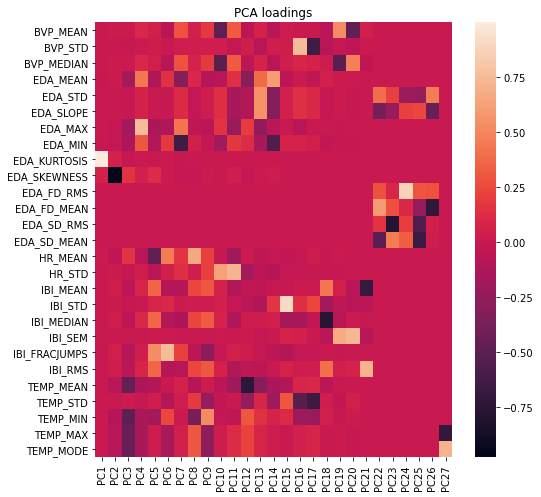

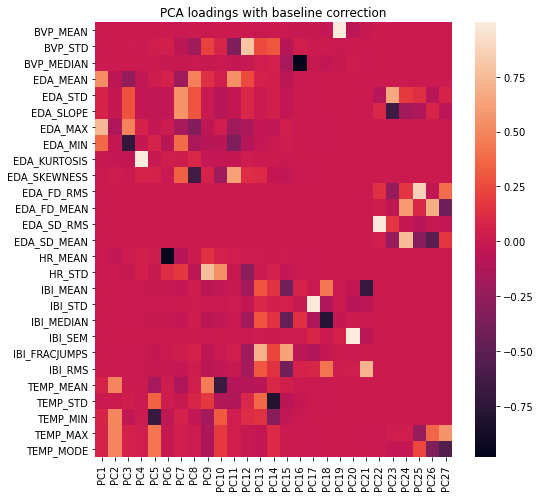

In [27]:
# Plot heatmap
data_analysis.plot_loadings_heatmap(X, features, title="PCA loadings", fig_size=(8,8)) 
data_analysis.plot_loadings_heatmap(X_rm_b, features, title="PCA loadings with baseline correction", fig_size=(8,8)) 

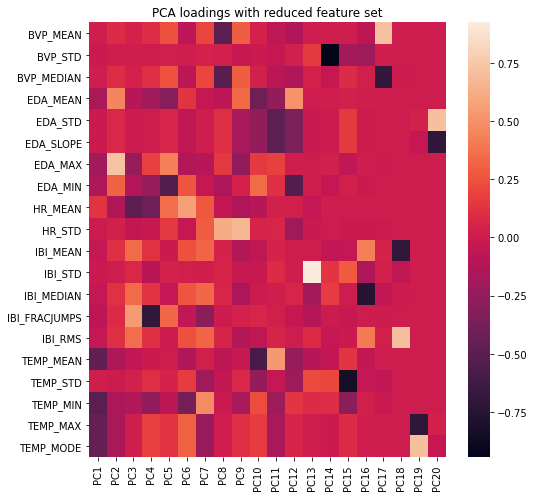

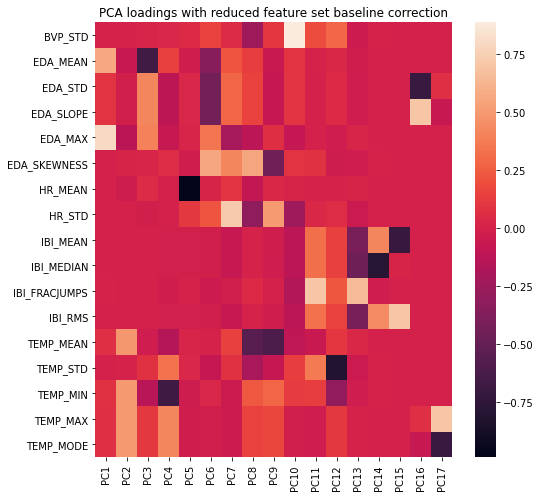

In [61]:
# Remove some features
features_to_remove = ["EDA_FD_RMS", "EDA_FD_MEAN", "EDA_SD_RMS", "EDA_SD_MEAN", "EDA_SKEWNESS", "EDA_KURTOSIS", "IBI_SEM"]
features_to_remove_rm_b = ["EDA_FD_RMS", "EDA_FD_MEAN", "EDA_SD_RMS", "EDA_MIN", "EDA_SD_MEAN", "BVP_MEAN", "EDA_KURTOSIS", "IBI_SEM", "IBI_STD", "BVP_MEDIAN"]

X_reduced, features_reduced = data_analysis.remove_features(X,y,features,features_to_remove)
X_reduced_rm_b, features_reduced_rm_b = data_analysis.remove_features(X_rm_b,y_rm_b,features,features_to_remove_rm_b)

# Test prints
# print(y.shape)
# print(y_reduced.shape)
# print(X.shape)
# print(X_reduced.shape)
# print(features)
# print(features_reduced)
# print(len(features_reduced))

# Check that right features were removed
data_analysis.plot_loadings_heatmap(X_reduced, features_reduced, title="PCA loadings with reduced feature set", fig_size=(8,8)) 
data_analysis.plot_loadings_heatmap(X_reduced_rm_b, features_reduced_rm_b, title="PCA loadings with reduced feature set baseline correction", fig_size=(8,8)) 


### Split into training and test set

In [58]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
X_train_rm_b, X_test_rm_b, y_train_rm_b, y_test_rm_b = train_test_split(X_rm_b, y_rm_b, test_size=0.05)

# Reduced feature-set
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.05)
X_train_reduced_rm_b, X_test_reduced_rm_b, y_train_reduced_rm_b, y_test_reduced_rm_b = train_test_split(X_reduced_rm_b, y_rm_b, test_size=0.05)

# Do not split
X_train = X
y_train = y

X_train_rm_b = X_rm_b
y_train_rm_b = y_rm_b

X_train_reduced = X_reduced
# y_train_reduced = y_reduced

X_train_reduced_rm_b = X_reduced_rm_b
# y_train_reduced_rm_b = y_reduced_rm_b

### Model selection and training

In [59]:
# Model selection
num_features = len(features)
num_features_reduced = len(features_reduced)
num_features_reduced_rm_b = len(features_reduced_rm_b)
# print(num_features)
# print(num_features_reduced)

models = data_analysis.get_models(1,num_features)
models_reduced = data_analysis.get_models(1,num_features_reduced)
models_reduced_rm_b = data_analysis.get_models(1,num_features_reduced_rm_b)

# Evaluate the models using cross validation
[best_model, best_degree, best_score, training_scores, avg_scores, min_scores, max_scores, std] = data_analysis.evaluate_models(models, X_train, y_train)
[best_model_rm_b, best_degree_rm_b, best_score_rm_b, training_scores_rm_b, avg_scores_rm_b, min_scores_rm_b, max_scores_rm_b, std_rm_b] = data_analysis.evaluate_models(models, X_train_rm_b, y_train_rm_b)

# Reduced
[best_model_reduced, best_degree_reduced, best_score_reduced, training_scores_reduced, avg_scores_reduced, min_scores_reduced, max_scores_reduced, std_reduced] = data_analysis.evaluate_models(models_reduced, X_train_reduced, y_train)
[best_model_reduced_rm_b, best_degree_reduced_rm_b, best_score_reduced_rm_b, training_scores_reduced_rm_b, avg_scores_reduced_rm_b, min_scores_reduced_rm_b, max_scores_reduced_rm_b, std_reduced_rm_b] = data_analysis.evaluate_models(models_reduced_rm_b, X_train_reduced_rm_b, y_train_rm_b)

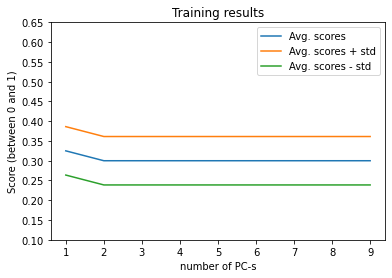

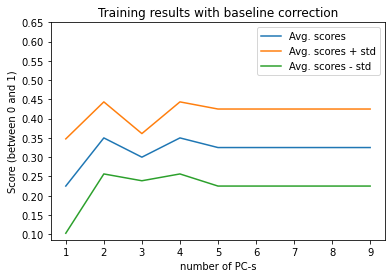

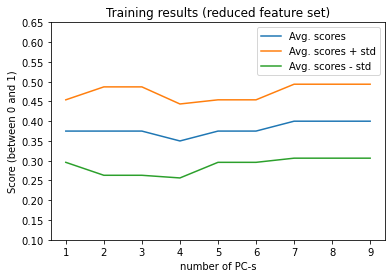

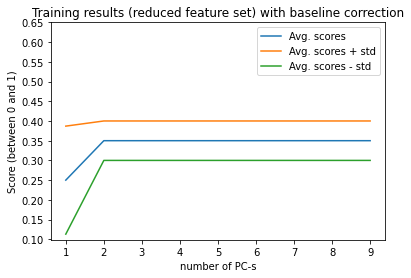

In [60]:
# Plot scores:
min_PC = 1
max_PC = 10

plt.figure()
num_PC = min(max_PC,num_features+1)
plt.plot(range(1,num_PC), avg_scores[0:num_PC - 1], label="Avg. scores")
# plt.plot(range(1,num_features+1), max_scores, label = "Max scores")
# plt.plot(range(1,num_features+1), min_scores, label = "Min scores")
plt.plot(range(1,num_PC), (avg_scores + std)[:num_PC-1], label = "Avg. scores + std")
plt.plot(range(1,num_PC), (avg_scores - std)[:num_PC-1], label = "Avg. scores - std")
# plt.plot(range(1,num_features+1), training_scores, label = "Training scores")
plt.title("Training results")
plt.legend(loc='upper right')
plt.xlabel("number of PC-s")
plt.ylabel("Score (between 0 and 1)")
plt.xticks(range(1,min(max_PC,num_features+1)))
plt.yticks(np.arange(0.1,0.7,step=0.05))
plt.show()

plt.figure()
num_PC = min(max_PC,num_features+1)
plt.plot(range(1,num_PC), avg_scores_rm_b[0:num_PC - 1], label="Avg. scores")
# plt.plot(range(1,num_features+1), max_scores_rm_b, label = "Max scores")
# plt.plot(range(1,num_features+1), min_scores_rm_b, label = "Min scores")
plt.plot(range(1,num_PC), (avg_scores_rm_b + std_rm_b)[0:num_PC - 1], label = "Avg. scores + std")
plt.plot(range(1,num_PC), (avg_scores_rm_b - std_rm_b)[0:num_PC - 1], label = "Avg. scores - std")
# plt.plot(range(1,num_features+1), training_scores_rm_b, label = "Training scores")
plt.title("Training results with baseline correction")
plt.legend(loc='upper right')
plt.xlabel("number of PC-s")
plt.ylabel("Score (between 0 and 1)")
plt.xticks(range(1,num_PC))
plt.yticks(np.arange(0.1,0.7,step=0.05))
plt.show()

plt.figure()
num_PC = min(max_PC,num_features_reduced + 1)
plt.plot(range(1,num_PC), avg_scores_reduced[0:num_PC - 1], label="Avg. scores")
# plt.plot(range(1,num_features_reduced+1), max_scores_reduced_rm_b, label = "Max scores")
# plt.plot(range(1,num_features_reduced+1), min_scores_reduced_rm_b, label = "Min scores")
plt.plot(range(1,num_PC), (avg_scores_reduced + std_reduced)[0:num_PC - 1], label = "Avg. scores + std")
plt.plot(range(1,num_PC), (avg_scores_reduced - std_reduced)[0:num_PC - 1], label = "Avg. scores - std")
plt.title("Training results (reduced feature set)")
plt.legend()
plt.xlabel("number of PC-s")
plt.ylabel("Score (between 0 and 1)")
plt.xticks(range(1,num_PC))
plt.yticks(np.arange(0.1,0.7,step=0.05))
plt.show()

plt.figure()
num_PC = min(max_PC,num_features_reduced + 1)
plt.plot(range(1,num_PC), avg_scores_reduced_rm_b[0:num_PC - 1], label="Avg. scores")
plt.plot(range(1,num_PC), (avg_scores_reduced_rm_b + std_reduced_rm_b)[0:num_PC - 1], label = "Avg. scores + std")
plt.plot(range(1,num_PC), (avg_scores_reduced_rm_b - std_reduced_rm_b)[0:num_PC - 1], label = "Avg. scores - std")
plt.title("Training results (reduced feature set) with baseline correction")
plt.legend()
plt.xlabel("number of PC-s")
plt.ylabel("Score (between 0 and 1)")
plt.xticks(range(1,num_PC))
plt.yticks(np.arange(0.1,0.7,step=0.05))
plt.show()

### Testing on training data

Score: 0.25, model order: 1, best score: 0.325
Score with baseline correction: 0.35, model order: 2, best score: 0.35
Score with reduced set: 0.6, model order: 7, best score: 0.4
Score reduced set and baseline correction: 0.35, model order: 3, best score: 0.35


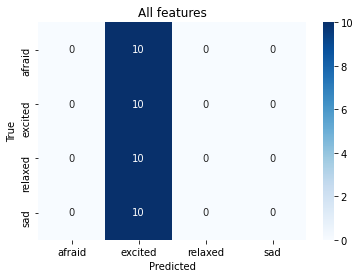

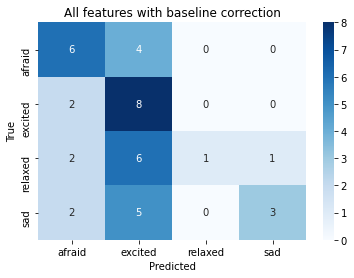

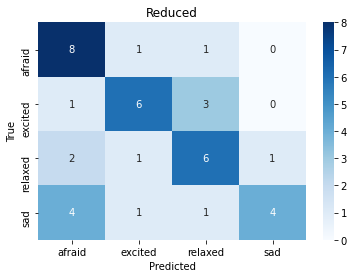

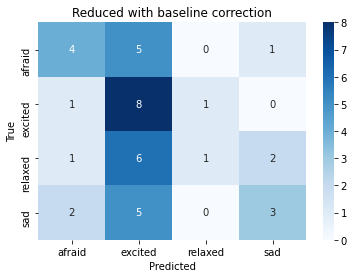

In [33]:
emotions = utils.get_list_emotions()[1:]

# Confusion matrix
y_pred = best_model.predict(X_train)
cm = confusion_matrix(y_train,y_pred)

plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title("All features")
plt.ylabel("True")
plt.xlabel("Predicted")

# score:
score = best_model.score(X_train,y_train)
print(f"Score: {score}, model order: {best_degree}, best score: {best_score}")


# Confusion matrix with baseline correction
y_pred_rm_b = best_model.predict(X_train_rm_b)
cm_rm_b = confusion_matrix(y_train, y_pred_rm_b)

plt.figure()
sns.heatmap(cm_rm_b, annot=True, cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title("All features with baseline correction")
plt.ylabel("True")
plt.xlabel("Predicted")

# score:
score_rm_b = best_model_rm_b.score(X_train_rm_b, y_train)
print(f"Score with baseline correction: {score_rm_b}, model order: {best_degree_rm_b}, best score: {best_score_rm_b}")


# Confusion matrix reduced with baseline correction
y_pred_reduced = best_model_reduced.predict(X_train_reduced)
cm_reduced = confusion_matrix(y_train,y_pred_reduced)

plt.figure()
sns.heatmap(cm_reduced, annot=True, cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title("Reduced")
plt.ylabel("True")
plt.xlabel("Predicted")

# score:
score_reduced = best_model_reduced.score(X_train_reduced,y_train)
print(f"Score with reduced set: {score_reduced}, model order: {best_degree_reduced}, best score: {best_score_reduced}")


# Confusion matrix reduced with baseline correction
y_pred_reduced_rm_b = best_model_reduced_rm_b.predict(X_train_reduced_rm_b)
cm_reduced_rm_b = confusion_matrix(y_train,y_pred_reduced_rm_b)

plt.figure()
sns.heatmap(cm_reduced_rm_b, annot=True, cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title("Reduced with baseline correction")
plt.ylabel("True")
plt.xlabel("Predicted")

# score:
score_reduced_rm_b = best_model_rm_b.score(X_train_rm_b,y_train)
print(f"Score reduced set and baseline correction: {score_reduced_rm_b}, model order: {best_degree_reduced_rm_b}, best score: {best_score_reduced_rm_b}")